In [5]:
# LOAD LIBRARIES
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression
import matplotlib.pyplot as plt

In [6]:
# LOAD DATASET
df = pd.read_csv("MSFT.csv")

# HANDLE MISSING VALUES (IF ANY)
df = df.dropna()

# FEATURES (X) AND TARGET (y)
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

# SPLIT DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SCALE FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# ADD POLYNOMIAL FEATURES
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [8]:
# K-NEAREST NEIGHBORS REGRESSION
best_k = None
best_r2_knn = float('-inf')

# TEST MULTIPLE K VALUES
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    r2_knn = r2_score(y_test, y_pred_knn)
    if r2_knn > best_r2_knn:
        best_k = k
        best_r2_knn = r2_knn

# FINAL KNN MODEL
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn_final = knn_final.predict(X_test_scaled)

In [9]:
# MULTIPLE LINEAR REGRESSION
mlr = LinearRegression()
mlr.fit(X_train_poly, y_train)
y_pred_mlr = mlr.predict(X_test_poly)

In [10]:
# RIDGE REGRESSION
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

In [11]:
# EVALUATION
models = ['KNN Regressor', 'Multiple Linear Regression', 'Ridge Regression']
MSE_values = [
    mean_squared_error(y_test, y_pred_knn_final),
    mean_squared_error(y_test, y_pred_mlr),
    mean_squared_error(y_test, y_pred_ridge)
]
R2_values = [
    r2_score(y_test, y_pred_knn_final),
    r2_score(y_test, y_pred_mlr),
    r2_score(y_test, y_pred_ridge)
]

# FIND BEST MODEL
best_model_index = np.argmax(R2_values)

print("Model Performance:")
for i, model in enumerate(models):
    print(f"{model}: MSE = {MSE_values[i]:.4f}, R2 = {R2_values[i]:.4f}")

print(f"Best Model: {models[best_model_index]} with R2 = {R2_values[best_model_index]:.4f}")

Model Performance:
KNN Regressor: MSE = 1.7487, R2 = 0.9998
Multiple Linear Regression: MSE = 0.3146, R2 = 1.0000
Ridge Regression: MSE = 0.4100, R2 = 0.9999
Best Model: Multiple Linear Regression with R2 = 1.0000


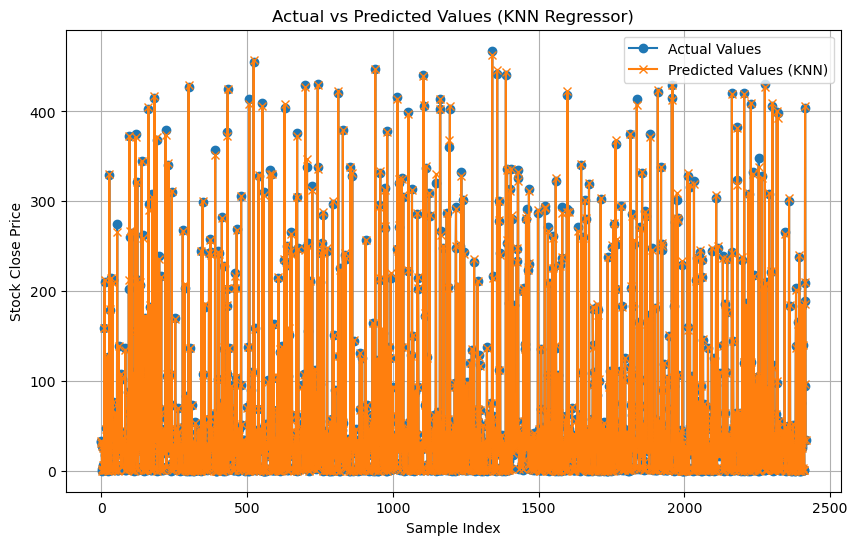

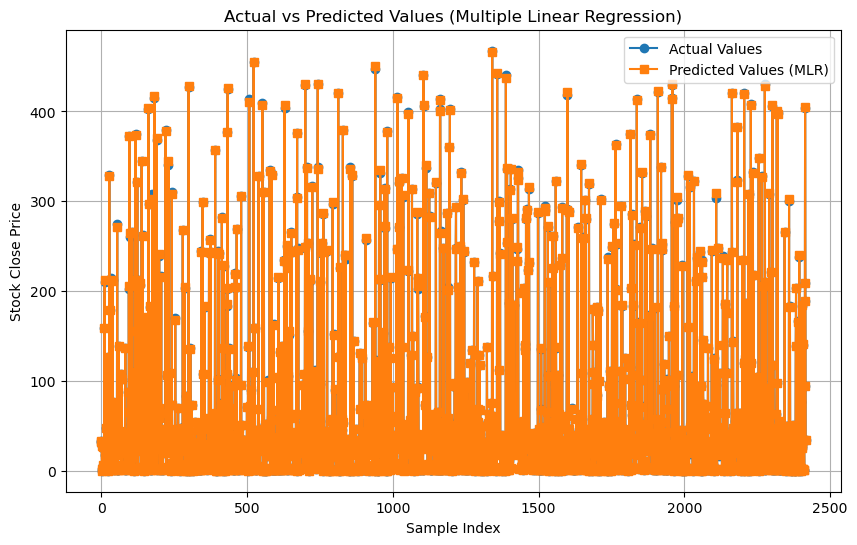

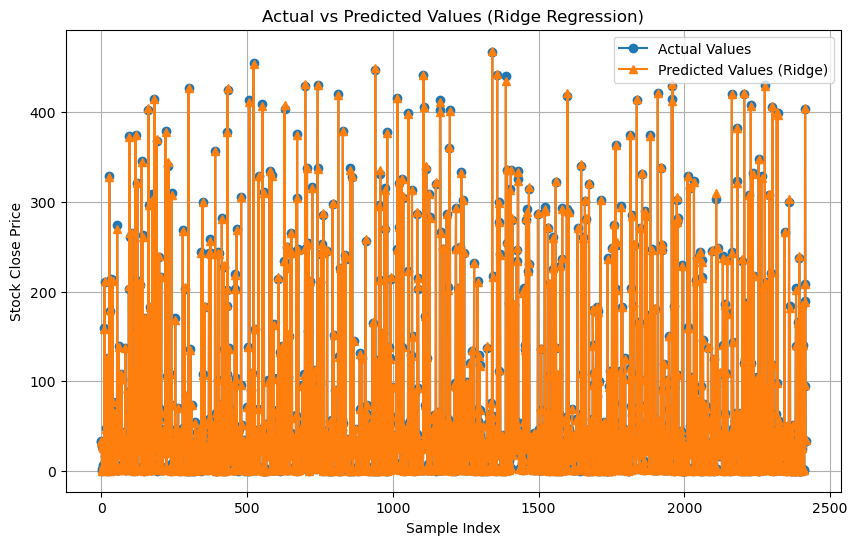

In [12]:
# KNN Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_pred_knn_final)), y_pred_knn_final, label='Predicted Values (KNN)', marker='x')
plt.title('Actual vs Predicted Values (KNN Regressor)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Close Price')
plt.legend()
plt.grid()
plt.show()

# Multiple Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_pred_mlr)), y_pred_mlr, label='Predicted Values (MLR)', marker='s')
plt.title('Actual vs Predicted Values (Multiple Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Close Price')
plt.legend()
plt.grid()
plt.show()

# Ridge Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_pred_ridge)), y_pred_ridge, label='Predicted Values (Ridge)', marker='^')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Close Price')
plt.legend()
plt.grid()
plt.show()